In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns 


In [2]:
# Loading the dataset
dataset_path =r"C:\Users\Ayesha\Downloads\datafile (1).csv" 
cultivation_data = pd.read_csv(dataset_path)

# Viewing basic information about the dataset
print(cultivation_data.info())

# Displaying the first few rows to understand the structure
print(cultivation_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Crop                                   49 non-null     object 
 1   State                                  49 non-null     object 
 2   Cost of Cultivation (`/Hectare) A2+FL  49 non-null     float64
 3   Cost of Cultivation (`/Hectare) C2     49 non-null     float64
 4   Cost of Production (`/Quintal) C2      49 non-null     float64
 5   Yield (Quintal/ Hectare)               49 non-null     float64
dtypes: float64(4), object(2)
memory usage: 2.4+ KB
None
    Crop           State  Cost of Cultivation (`/Hectare) A2+FL  \
0  ARHAR   Uttar Pradesh                                9794.05   
1  ARHAR       Karnataka                               10593.15   
2  ARHAR         Gujarat                               13468.82   
3  ARHAR  Andhra Pradesh     

In [3]:
# Checking for missing values
print(cultivation_data.isnull().sum())


Crop                                     0
State                                    0
Cost of Cultivation (`/Hectare) A2+FL    0
Cost of Cultivation (`/Hectare) C2       0
Cost of Production (`/Quintal) C2        0
Yield (Quintal/ Hectare)                 0
dtype: int64


In [4]:
# Dropping missing values if necessary
cultivation_data = cultivation_data.dropna()


In [6]:
# Printing the column names to verify their exact names
print(cultivation_data.columns)


Index(['Crop', 'State', 'Cost of Cultivation (`/Hectare) A2+FL',
       'Cost of Cultivation (`/Hectare) C2',
       'Cost of Production (`/Quintal) C2', 'Yield (Quintal/ Hectare) '],
      dtype='object')


In [7]:

cultivation_data['Per Hectare Cost Price'] = cultivation_data['Cost of Production (`/Quintal) C2'] * cultivation_data['Yield (Quintal/ Hectare) ']
cultivation_data['Cost of cultivation per hectare'] = cultivation_data['Cost of Cultivation (`/Hectare) A2+FL'] + cultivation_data['Cost of Cultivation (`/Hectare) C2']
cultivation_data['Yield in Kg per hectare'] = cultivation_data['Yield (Quintal/ Hectare) '] * 100

# View the updated data
print(cultivation_data.head())


    Crop           State  Cost of Cultivation (`/Hectare) A2+FL  \
0  ARHAR   Uttar Pradesh                                9794.05   
1  ARHAR       Karnataka                               10593.15   
2  ARHAR         Gujarat                               13468.82   
3  ARHAR  Andhra Pradesh                               17051.66   
4  ARHAR     Maharashtra                               17130.55   

   Cost of Cultivation (`/Hectare) C2  Cost of Production (`/Quintal) C2  \
0                            23076.74                            1941.55   
1                            16528.68                            2172.46   
2                            19551.90                            1898.30   
3                            24171.65                            3670.54   
4                            25270.26                            2775.80   

   Yield (Quintal/ Hectare)   Per Hectare Cost Price  \
0                       9.83              19085.4365   
1                       7.47

In [9]:
# Stripping any extra whitespace from column names
cultivation_data.columns = cultivation_data.columns.str.strip()

# Now the column names will no longer have extra spaces
cultivation_data['Per Hectare Cost Price'] = cultivation_data['Cost of Production (`/Quintal) C2'] * cultivation_data['Yield (Quintal/ Hectare)']
cultivation_data['Cost of cultivation per hectare'] = cultivation_data['Cost of Cultivation (`/Hectare) A2+FL'] + cultivation_data['Cost of Cultivation (`/Hectare) C2']
cultivation_data['Yield in Kg per hectare'] = cultivation_data['Yield (Quintal/ Hectare)'] * 100

# Viewing the updated data
print(cultivation_data.head())


    Crop           State  Cost of Cultivation (`/Hectare) A2+FL  \
0  ARHAR   Uttar Pradesh                                9794.05   
1  ARHAR       Karnataka                               10593.15   
2  ARHAR         Gujarat                               13468.82   
3  ARHAR  Andhra Pradesh                               17051.66   
4  ARHAR     Maharashtra                               17130.55   

   Cost of Cultivation (`/Hectare) C2  Cost of Production (`/Quintal) C2  \
0                            23076.74                            1941.55   
1                            16528.68                            2172.46   
2                            19551.90                            1898.30   
3                            24171.65                            3670.54   
4                            25270.26                            2775.80   

   Yield (Quintal/ Hectare)  Per Hectare Cost Price  \
0                      9.83              19085.4365   
1                      7.47   

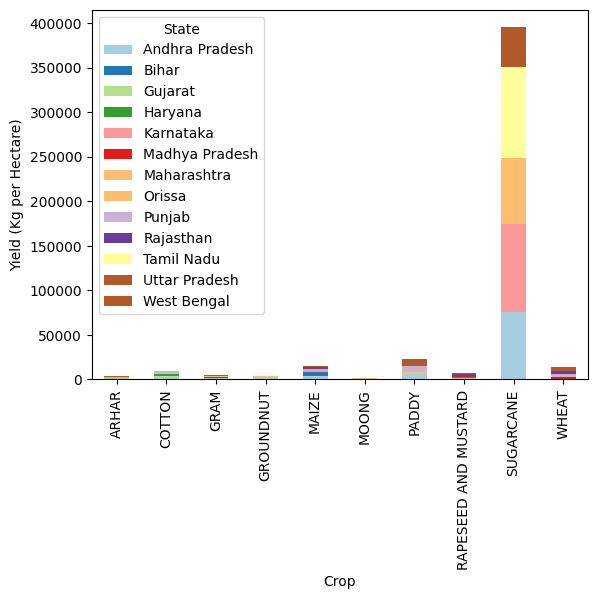

In [12]:
# Pivot the dataframe to show data by Crop and State
pivot_table = new_data.pivot(index='Crop', columns='State', values='Yield in Kg per hectare')

# Replace NaN values with 0
pivot_table = pivot_table.fillna(0)

# Plot the data as a stacked bar plot
pivot_table.plot(kind='bar', stacked=True, colormap='Paired')

# Add labels and show the plot
plt.ylabel('Yield (Kg per Hectare)')
plt.show()


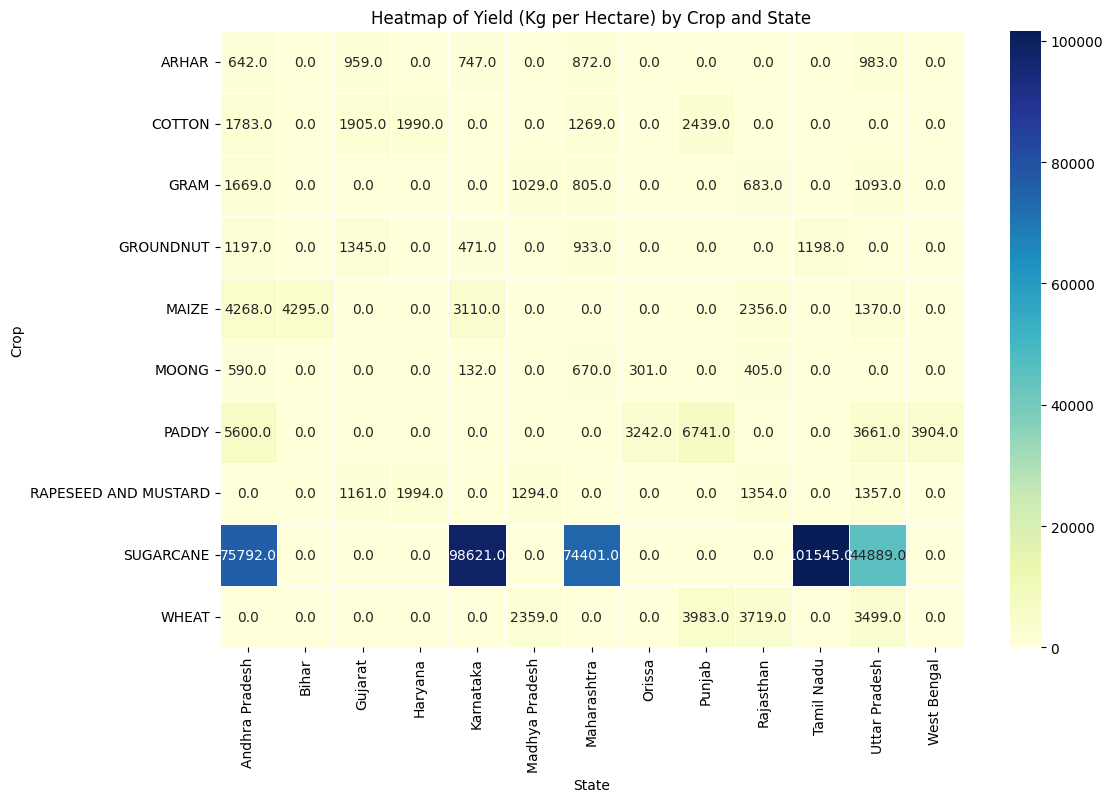

In [17]:
import seaborn as sns

# Create a heatmap for yield across states and crops
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap of Yield (Kg per Hectare) by Crop and State')
plt.ylabel('Crop')
plt.xlabel('State')
plt.show()


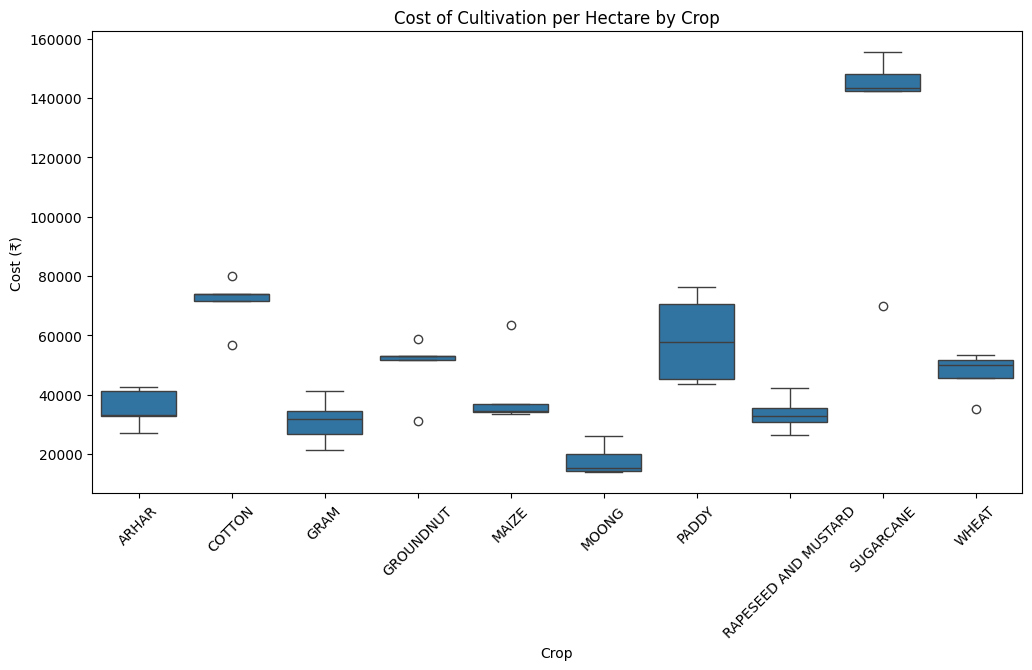

In [20]:
# Box plot for cost of cultivation per hectare across crops
plt.figure(figsize=(12, 6))
sns.boxplot(x='Crop', y='Cost of cultivation per hectare', data=cultivation_data)
plt.title('Cost of Cultivation per Hectare by Crop')
plt.xticks(rotation=45)
plt.ylabel('Cost (₹)')
plt.show()
